In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import os
import os.path
import random
import numpy as np
import random
import requests
from tensorflow.python.framework import ops
import pandas as pd

In [2]:
df1 = pd.read_csv('train_genba.tsv', sep='\t')
df2 = pd.read_csv('train_goto.tsv', sep='\t')
df = pd.merge(df1, df2, on='pj_no', how='outer')

del df1
del df2

dftest1 = pd.read_csv('test_genba.tsv', sep='\t')
dftest2 = pd.read_csv('test_goto.tsv', sep='\t')
dftest = pd.merge(dftest1, dftest2, on='pj_no', how='outer')

del dftest1
del dftest2

# 出力用
dftest_id = dftest['id']

# 欠損値をペアワイズ法により削除
for i, j in zip(df.isnull().any(), df.columns):
    if i == True:
        df = df.drop(j, axis=1)

for i, j in zip(dftest.isnull().any(), dftest.columns):
    if i == True:
        dftest = dftest.drop(j, axis=1)

df = df.drop('road1_sb', axis=1)
df = df.drop('gk_yoc_tm', axis=1)

dftest = dftest.drop('chiseki_kb_hb', axis=1)
dftest = dftest.drop('tt_mseki_avg_hb', axis=1)

factorize = []

# string => float, int
for i, j in zip(df.columns, df.dtypes):
    if j == 'object':
        factorize.append(i)
    
for i in factorize:
    id_1, id_2 = df[i].factorize()
    id_3 = pd.DataFrame({i: id_1})
    df[i] = id_3
    dftest[i] = id_3

# X, Y
#dfall = df.drop('keiyaku_pr', axis=1)
#X = pd.DataFrame(dfall)
#Y = pd.DataFrame(df['keiyaku_pr'])
#XX = pd.DataFrame(dftest)
#Y.head()
dfall = df.drop('keiyaku_pr', axis=1)
x_vals = dfall.as_matrix()
y_vals= df['keiyaku_pr'].as_matrix()
XX = dftest.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [6]:
df = pd.read_csv('train.tsv', sep='\t')
dftest = pd.read_csv('test.tsv', sep='\t')
df_keiyaku_pr = pd.read_csv('keiyaku_pr.tsv', sep='\t')
dftest_id = pd.read_csv('id.tsv', sep='\t')

df

,0,0.1,109.26,0.2,60,200,0.3,0.4,0.5,0.6,0.7,4.0,7.0,0.8,0.6.1,0.9,0.10,800,1000,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,135000,188000,197000,109.26.1,109.26.2,109.26.3,104.43,104.43.1,109.26.4,0.22,...,0.143,1.3,5,0.144,1.4,0.145,0.146,0.147,0.148,0.149,0.150,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,0.0.10,0.0.11,0.0.12,0.0.13,0.0.14,0.0.15,0.0.16,0.0.17,0.0.18,0.0.19,0.0.20,0.0.21,2.9783008098602295,0.151,1.4423248767852783,5.985511779785156,4.154595375061035,0.0.22,0.0.23
0,1,1,136.15,1,60,200,0,0,0,0,1,4.2,9.3,0,0.0,0,0,1680,1840,0,0,0,1,0,0,0,0,0,1,0,68000,84900,48600,136.15,136.15,136.15,109.10,109.10,136.15,0,...,0.0,1.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.466699,0.0,0.0,1.0,0.000000,0.00000,1.539150,1.0,2.184877,3.843050,2.581336,1.0,1.0
1,2,2,86.92,1,50,100,1,1,0,0,2,4.0,11.1,1,0.2,0,0,600,550,0,1,0,1,0,0,0,0,0,0,0,83000,116000,124000,86.92,86.92,86.92,85.96,85.96,86.92,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0000,0.555936,0.0,0.0,2.0,0.000000,0.00000,0.000000,0.0,2.332870,7.469825,4.749739,0.0,2.0
2,3,3,164.91,0,60,200,0,0,1,0,3,4.0,13.3,0,0.3,0,0,1220,111,1,0,0,1,0,0,0,0,1,0,0,91000,122000,113000,164.07,164.07,164.07,105.99,105.99,164.07,0,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.511784,0.0,1.0,3.0,0.000000,0.00000,2.590573,2.0,0.886015,5.748249,3.399953,0.0,3.0
3,4,4,403.58,1,50,80,0,0,1,0,4,4.0,13.9,0,0.1,0,0,480,2800,1,0,0,1,0,0,0,0,0,1,0,160000,179000,160000,334.58,111.52,111.53,89.27,89.27,111.52,0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.030786,0.0,0.0,4.0,0.000000,0.00000,-5.746495,3.0,0.461751,1.932604,3.658062,0.0,4.0
4,4,4,403.58,1,50,80,0,0,1,0,4,4.0,13.9,0,0.1,0,0,480,2800,1,0,0,1,0,0,0,0,0,1,0,160000,179000,160000,334.58,111.52,111.53,89.27,89.27,111.52,0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.030786,0.0,0.0,4.0,0.000000,0.00000,-5.746495,3.0,0.461751,1.932604,3.658062,0.0,5.0
5,4,4,403.58,1,50,80,0,0,1,0,4,4.0,13.9,0,0.1,0,0,480,2800,1,0,0,1,0,0,0,0,0,1,0,160000,179000,160000,334.58,111.52,111.53,89.27,89.27,111.52,0,...,0.0,4.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.030786,0.0,0.0,4.0,0.000000,0.00000,-5.746495,3.0,0.461751,1.932604,3.658062,0.0,6.0
6,5,5,114.44,2,60,200,0,0,1,0,1,4.0,11.2,1,0.2,0,0,700,2200,1,1,0,1,1,0,0,0,0,1,0,0,83100,85300,114.44,114.00,114.00,98.95,98.95,114.44,0,...,0.0,5.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.0000,1.000000,0.0,0.0,5.0,0.000000,0.00000,1.000000,4.0,0.000000,2.588485,2.398197,0.0,7.0
7,6,6,531.98,3,60,200,0,1,0,0,4,16.4,23.6,1,1.2,0,0,1500,1040,1,1,1,1,0,0,1,0,0,0,0,0,42600,99000,515.98,241.73,274.25,0.00,0.00,257.99,0,...,0.0,2.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,6.0,0.0,0.0,2.0,1.000000,0.000000,0.000000,2.0,0.0,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.0000,3.401006,1.0,0.0,6.0,0.000000,0.00000,13.747713,0.0,1.000000,4.904974,3.466857,2.0,8.0
8,6,6,531.98,3,60,200,0,1,0,0,4,16.4,23.6,1,1.2,0,0,1500,1040,1,1,1,1,0,0,1,0,0,0,0,0,42600,99000,515.98,241.73,274.25,0.00,0.00,257.99,0,...,0.0,2.0,0.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,6.0,0.0,0.0,2.0,1.000000,0.000000,0.000000,2.0,0.0,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.0000,3.401006,1.0,0.0,6.0,0.000000,0.00000,13.027136,0.0,1.000000,4.902790,3.466857,3.0

In [7]:
df = df.reset_index(drop=True)
dftest = dftest.reset_index(drop=True)
df_keiyaku_pr = df_keiyaku_pr.reset_index(drop=True)
dftest_id = dftest_id.reset_index(drop=True)

x_vals = df.as_matrix()
y_vals= df_keiyaku_pr.as_matrix()
XX = dftest.as_matrix()

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,0,0.1,109.26,0.2,60,200,0.3,0.4,0.5,0.6,0.7,4.0,7.0,0.8,0.6.1,0.9,0.10,800,1000,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,135000,188000,197000,109.26.1,109.26.2,109.26.3,104.43,104.43.1,109.26.4,0.22,...,0.143,1.3,5,0.144,1.4,0.145,0.146,0.147,0.148,0.149,0.150,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,0.0.10,0.0.11,0.0.12,0.0.13,0.0.14,0.0.15,0.0.16,0.0.17,0.0.18,0.0.19,0.0.20,0.0.21,2.9783008098602295,0.151,1.4423248767852783,5.985511779785156,4.154595375061035,0.0.22,0.0.23
0,1,1,136.15,1,60,200,0,0,0,0,1,4.2,9.3,0,0.0,0,0,1680,1840,0,0,0,1,0,0,0,0,0,1,0,68000,84900,48600,136.15,136.15,136.15,109.10,109.10,136.15,0,...,0.0,1.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.466699,0.0,0.0,1.0,0.000000,0.00000,1.539150,1.0,2.184877,3.843050,2.581336,1.0,1.0
1,2,2,86.92,1,50,100,1,1,0,0,2,4.0,11.1,1,0.2,0,0,600,550,0,1,0,1,0,0,0,0,0,0,0,83000,116000,124000,86.92,86.92,86.92,85.96,85.96,86.92,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0000,0.555936,0.0,0.0,2.0,0.000000,0.00000,0.000000,0.0,2.332870,7.469825,4.749739,0.0,2.0
2,3,3,164.91,0,60,200,0,0,1,0,3,4.0,13.3,0,0.3,0,0,1220,111,1,0,0,1,0,0,0,0,1,0,0,91000,122000,113000,164.07,164.07,164.07,105.99,105.99,164.07,0,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.511784,0.0,1.0,3.0,0.000000,0.00000,2.590573,2.0,0.886015,5.748249,3.399953,0.0,3.0
3,4,4,403.58,1,50,80,0,0,1,0,4,4.0,13.9,0,0.1,0,0,480,2800,1,0,0,1,0,0,0,0,0,1,0,160000,179000,160000,334.58,111.52,111.53,89.27,89.27,111.52,0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.030786,0.0,0.0,4.0,0.000000,0.00000,-5.746495,3.0,0.461751,1.932604,3.658062,0.0,4.0
4,4,4,403.58,1,50,80,0,0,1,0,4,4.0,13.9,0,0.1,0,0,480,2800,1,0,0,1,0,0,0,0,0,1,0,160000,179000,160000,334.58,111.52,111.53,89.27,89.27,111.52,0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.030786,0.0,0.0,4.0,0.000000,0.00000,-5.746495,3.0,0.461751,1.932604,3.658062,0.0,5.0
5,4,4,403.58,1,50,80,0,0,1,0,4,4.0,13.9,0,0.1,0,0,480,2800,1,0,0,1,0,0,0,0,0,1,0,160000,179000,160000,334.58,111.52,111.53,89.27,89.27,111.52,0,...,0.0,4.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.030786,0.0,0.0,4.0,0.000000,0.00000,-5.746495,3.0,0.461751,1.932604,3.658062,0.0,6.0
6,5,5,114.44,2,60,200,0,0,1,0,1,4.0,11.2,1,0.2,0,0,700,2200,1,1,0,1,1,0,0,0,0,1,0,0,83100,85300,114.44,114.00,114.00,98.95,98.95,114.44,0,...,0.0,5.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.0000,1.000000,0.0,0.0,5.0,0.000000,0.00000,1.000000,4.0,0.000000,2.588485,2.398197,0.0,7.0
7,6,6,531.98,3,60,200,0,1,0,0,4,16.4,23.6,1,1.2,0,0,1500,1040,1,1,1,1,0,0,1,0,0,0,0,0,42600,99000,515.98,241.73,274.25,0.00,0.00,257.99,0,...,0.0,2.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,6.0,0.0,0.0,2.0,1.000000,0.000000,0.000000,2.0,0.0,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.0000,3.401006,1.0,0.0,6.0,0.000000,0.00000,13.747713,0.0,1.000000,4.904974,3.466857,2.0,8.0
8,6,6,531.98,3,60,200,0,1,0,0,4,16.4,23.6,1,1.2,0,0,1500,1040,1,1,1,1,0,0,1,0,0,0,0,0,42600,99000,515.98,241.73,274.25,0.00,0.00,257.99,0,...,0.0,2.0,0.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,6.0,0.0,0.0,2.0,1.000000,0.000000,0.000000,2.0,0.0,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.0000,3.401006,1.0,0.0,6.0,0.000000,0.00000,13.027136,0.0,1.000000,4.902790,3.466857,3.0

In [0]:
#birth_weight_file = 'birth_weight.csv'

# download data and create data file if file does not exist in current directory
#if not os.path.exists(birth_weight_file):
#    birthdata_url = 'https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat'
#    birth_file = requests.get(birthdata_url)
#    birth_data = birth_file.text.split('\r\n')
#    birth_header = birth_data[0].split('\t')
#    birth_data = [[float(x) for x in y.split('\t') if len(x)>=1] for y in birth_data[1:] if len(y)>=1]
#    with open(birth_weight_file, "w") as f:
#        writer = csv.writer(f)
#        writer.writerows([birth_header])
#        writer.writerows(birth_data)
#        f.close()

# read birth weight data into memory
#birth_data = []
#with open(birth_weight_file, newline='') as csvfile:
#    csv_reader = csv.reader(csvfile)
#    birth_header = next(csv_reader)
#    for row in csv_reader:
#        birth_data.append(row)

#birth_data = [[float(x) for x in row] for row in birth_data]


# Extract y-target (birth weight)
#y_vals = np.array([x[8] for x in birth_data])

# Filter for features of interest
#cols_of_interest = ['AGE', 'LWT', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI']
#x_vals = np.array([[x[ix] for ix, feature in enumerate(birth_header) if feature in cols_of_interest] for x in birth_data])

#x_vals.shape

In [0]:
#for i in range(601):
#    ii = str(i)
#    Y[ii] = (Y['keiyaku_pr'] == i)
#
#Y = Y.drop('keiyaku_pr', axis=1)
#Y = Y * 1
#y_vals = Y.as_matrix()
#y_vals.shape

In [14]:
# reset the graph for new run
ops.reset_default_graph()

# Create graph session 
sess = tf.Session()

# set batch size for training
batch_size = 50

# make results reproducible
seed = 3
np.random.seed(seed)
tf.set_random_seed(seed)

# Split data into train/test = 80%/20%
#train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
#test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
train_indices = np.random.choice(len(x_vals), round(len(x_vals)), replace=False)
x_vals_train = x_vals[train_indices]
#x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
#y_vals_test = y_vals[test_indices]

IndexError: ignored

In [6]:
# Record training column max and min for scaling of non-training data
train_max = np.max(x_vals_train, axis=0)
train_min = np.min(x_vals_train, axis=0)

# Normalize by column (min-max norm to be between 0 and 1)
def normalize_cols(mat, max_vals, min_vals):
    return (mat - min_vals) / (max_vals - min_vals)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train, train_max, train_min))
#x_vals_test = np.nan_to_num(normalize_cols(x_vals_test, train_max, train_min))

XX = np.nan_to_num(normalize_cols(XX, train_max, train_min))

x_vals_train.shape

(6461, 53)

In [0]:
# Define Variable Functions (weights and bias)
def init_weight(shape, st_dev):
    weight = tf.Variable(tf.random_normal(shape, stddev=st_dev))
    return(weight)
    

def init_bias(shape, st_dev):
    bias = tf.Variable(tf.random_normal(shape, stddev=st_dev))
    return(bias)
    
    
# Create Placeholders
x_data = tf.placeholder(shape=[None, 209], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [0]:
# Create a fully connected layer:
def fully_connected(input_layer, weights, biases):
    layer = tf.add(tf.matmul(input_layer, weights), biases)
    return(tf.nn.relu(layer))

def final_connected(input_layer, weights, biases):
    layer = tf.add(tf.matmul(input_layer, weights), biases)
    return(layer)

#--------Create the first layer (50 hidden nodes)--------
weight_1 = init_weight(shape=[209, 150], st_dev=10.0)
bias_1 = init_bias(shape=[150], st_dev=10.0)
layer_1 = fully_connected(x_data, weight_1, bias_1)

#--------Create second layer (25 hidden nodes)--------
weight_2 = init_weight(shape=[150, 100], st_dev=10.0)
bias_2 = init_bias(shape=[100], st_dev=10.0)
layer_2 = fully_connected(layer_1, weight_2, bias_2)


#--------Create third layer (5 hidden nodes)--------
weight_3 = init_weight(shape=[100, 50], st_dev=10.0)
bias_3 = init_bias(shape=[50], st_dev=10.0)
layer_3 = fully_connected(layer_2, weight_3, bias_3)


#--------Create output layer (1 output value)--------
weight_4 = init_weight(shape=[50, 1], st_dev=10.0)
bias_4 = init_bias(shape=[1], st_dev=10.0)
final_output = final_connected(layer_3, weight_4, bias_4)

# Declare loss function (L1)
loss = tf.reduce_mean(tf.abs(y_target - final_output))

# Declare optimizer
my_opt = tf.train.AdamOptimizer(0.001)
train_step = my_opt.minimize(loss)

In [10]:
# Initialize Variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
test_loss = []
for i in range(100000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    #test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    #test_loss.append(test_temp_loss)
    if (i+1) % 10000 == 0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss)) 
              #+ '. TEST_LOSS0 ' + str(test_temp_loss))

Generation: 10000. Loss = 3079665.0


KeyboardInterrupt: ignored

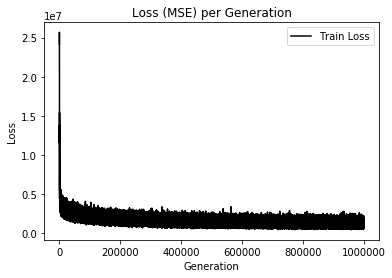

In [0]:
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(loss_vec, 'k-', label='Train Loss')
#plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

In [0]:
YY = sess.run(final_output, feed_dict={x_data: XX})
df_pre = pd.DataFrame(YY)
df_pre.head()

,0
0,19555892.0
1,26166438.0
2,23082578.0
3,18647858.0
4,23442184.0


In [0]:
df_pre = df_pre.astype(int)
df_pre = df_pre.round()
df_pre = pd.concat(objs=[dftest_id, df_pre], axis=1)
df_pre.head()

,id,0
0,test_0000,19555892
1,test_0001,26166438
2,test_0002,23082578
3,test_0003,18647858
4,test_0004,23442184


In [0]:
df_pre.to_csv('test_pre.tsv', sep='\t', index=False, header=False)